In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
# Download and extract data
import datetime
from timeit import default_timer as timer
start = timer()
fileId = drive.CreateFile({'id': '1hxYElFxXaygH0p6rNpY2n2_2hIMThUIC'})
print('Downloading', fileId['title'], '...', end=' ')
fileId.GetContentFile('chest_xray.zip')
print('Done')
fileId = drive.CreateFile({'id': '1-MSH3ZCm396ugPK_jZBrRel9GXsYcMG5'})
print('Downloading', fileId['title'], '...', end=' ')
fileId.GetContentFile('ieee8023.zip')
print('Done')
print('Extracting data ...', end=' ')
!unzip -oq chest_xray.zip
!unzip -oq ieee8023.zip
print('Done')
print('\nTotal elapsed time:', str(datetime.timedelta(seconds=round(timer()-start))))

Extracting data ... Done

Total elapsed time: 0:01:33


**Explore the data**

In [8]:
import pandas as pd

data_covid = pd.read_csv('ieee8023/metadata.csv')
data_covid.info()
data_covid.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               673 non-null    object 
 1   offset                  524 non-null    float64
 2   sex                     606 non-null    object 
 3   age                     522 non-null    float64
 4   finding                 673 non-null    object 
 5   survival                264 non-null    object 
 6   intubated               237 non-null    object 
 7   intubation_present      235 non-null    object 
 8   went_icu                296 non-null    object 
 9   in_icu                  243 non-null    object 
 10  needed_supplemental_O2  81 non-null     object 
 11  extubated               36 non-null     object 
 12  temperature             73 non-null     float64
 13  pO2_saturation          117 non-null    float64
 14  leukocyte_count         15 non-null     fl

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [9]:
data_covid.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,524.000000,522.000000,73.000000,117.000000,15.000000,28.000000,37.000000
mean,9.507634,55.829502,38.957534,75.489744,5.093333,4.742857,4.927622
std,23.369137,16.367881,6.712280,36.911897,2.738873,3.150569,21.361152
min,-28.000000,12.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,45.000000,37.700000,55.000000,3.005000,2.650000,0.800000
50%,5.000000,56.000000,38.200000,84.000000,5.500000,3.950000,1.100000
75%,10.000000,70.000000,39.000000,93.000000,6.875000,6.325000,1.600000
max,240.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [11]:
display(data_covid.groupby(['finding','sex','survival']).size().to_frame().add_prefix('X_').rename(columns={'X_0': 'count'}))

count
finding                        sex survival       
Bacterial                      M   Y             4
COVID-19                       F   N            10
                                   Y            64
                               M   N            18
                                   Y            71
COVID-19, ARDS                 F   N             1
                               M   N             3
Chlamydophila                  M   Y             2
E.Coli                         F   Y             4
Influenza                      M   N             2
Klebsiella                     M   Y             5
Legionella                     M   N             4
Lipoid                         M   Y             3
Mycoplasma Bacterial Pneumonia M   Y             8
No Finding                     F   Y             5
                               M   Y             2
Pneumocystis                   F   N             3
                               M   Y             2
Pneumonia                      F   Y            10
SARS                           F   N             3
                                   Y             5
                               M   N             3
Streptococcus                  F   Y             3
                               M   Y             4
Varicella                      M   Y             5

M    387
F    219
Name: sex, dtype: int64

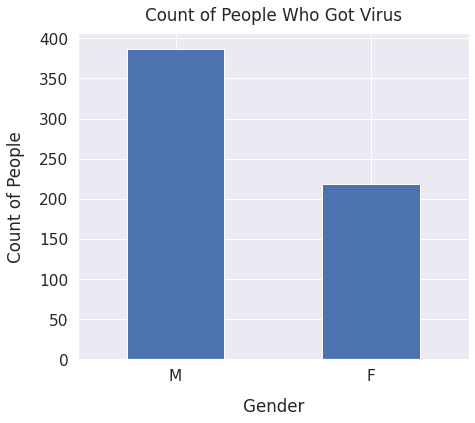

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

display(data_covid['sex'].value_counts())

sns.set(font_scale=1.4)
data_covid['sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Got Virus", y=1.02)
plt.show()

COVID-19                          526
No Finding                         23
Streptococcus                      17
Pneumocystis                       17
SARS                               16
Pneumonia                          14
COVID-19, ARDS                     12
Mycoplasma Bacterial Pneumonia      8
Klebsiella                          8
Legionella                          6
Varicella                           5
Lipoid                              5
Bacterial                           4
E.Coli                              4
ARDS                                4
Chlamydophila                       2
Influenza                           2
Name: finding, dtype: int64

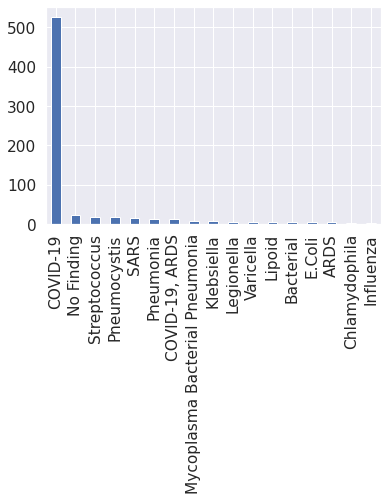

In [14]:
display(data_covid['finding'].value_counts())

data_covid['finding'].value_counts().plot(kind='bar')
plt.show()

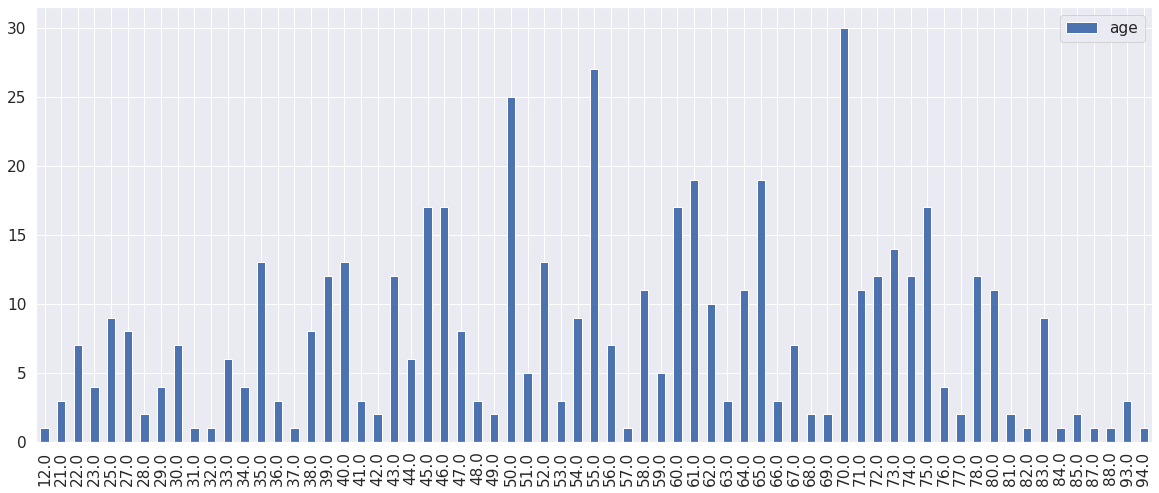

In [29]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
data_covid['age'].value_counts().to_frame().sort_index().plot(kind='bar', ax=ax)
plt.show()

In [30]:
display(data_covid['view'].value_counts())

PA           302
AP Supine    134
AP           106
Axial         68
L             47
Coronal       16
Name: view, dtype: int64

In [65]:
data_covid['filename']

0      auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1      auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2      auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3      auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4                                  nejmc2001573_f1a.jpeg
                             ...                        
668                            covid-19-caso-95-2-16.png
669                            covid-19-caso-95-3-14.png
670                            covid-19-caso-95-4-12.png
671                            covid-19-caso-99-1-19.png
672                           covid-19-caso-111-1-21.png
Name: filename, Length: 673, dtype: object

In [64]:
data_covid['image_path'] = data_covid.apply(lambda row: 'ieee8023/images/' + row['filename'], axis = 1)
data_covid['image_path']

0      ieee8023/images/auntminnie-a-2020_01_28_23_51_...
1      ieee8023/images/auntminnie-b-2020_01_28_23_51_...
2      ieee8023/images/auntminnie-c-2020_01_28_23_51_...
3      ieee8023/images/auntminnie-d-2020_01_28_23_51_...
4                  ieee8023/images/nejmc2001573_f1a.jpeg
                             ...                        
668            ieee8023/images/covid-19-caso-95-2-16.png
669            ieee8023/images/covid-19-caso-95-3-14.png
670            ieee8023/images/covid-19-caso-95-4-12.png
671            ieee8023/images/covid-19-caso-99-1-19.png
672           ieee8023/images/covid-19-caso-111-1-21.png
Name: image_path, Length: 673, dtype: object

In [66]:
# check for anomalous extension in image_path
import os

def get_extension(path):
  filename, file_extension = os.path.splitext(path)
  return file_extension

data_covid['file_extension'] = data_covid['filename'].apply(get_extension)
display(data_covid['file_extension'].value_counts())

.jpg     344
.png     185
.jpeg    118
.gz       21
.PNG       4
.JPG       1
Name: file_extension, dtype: int64

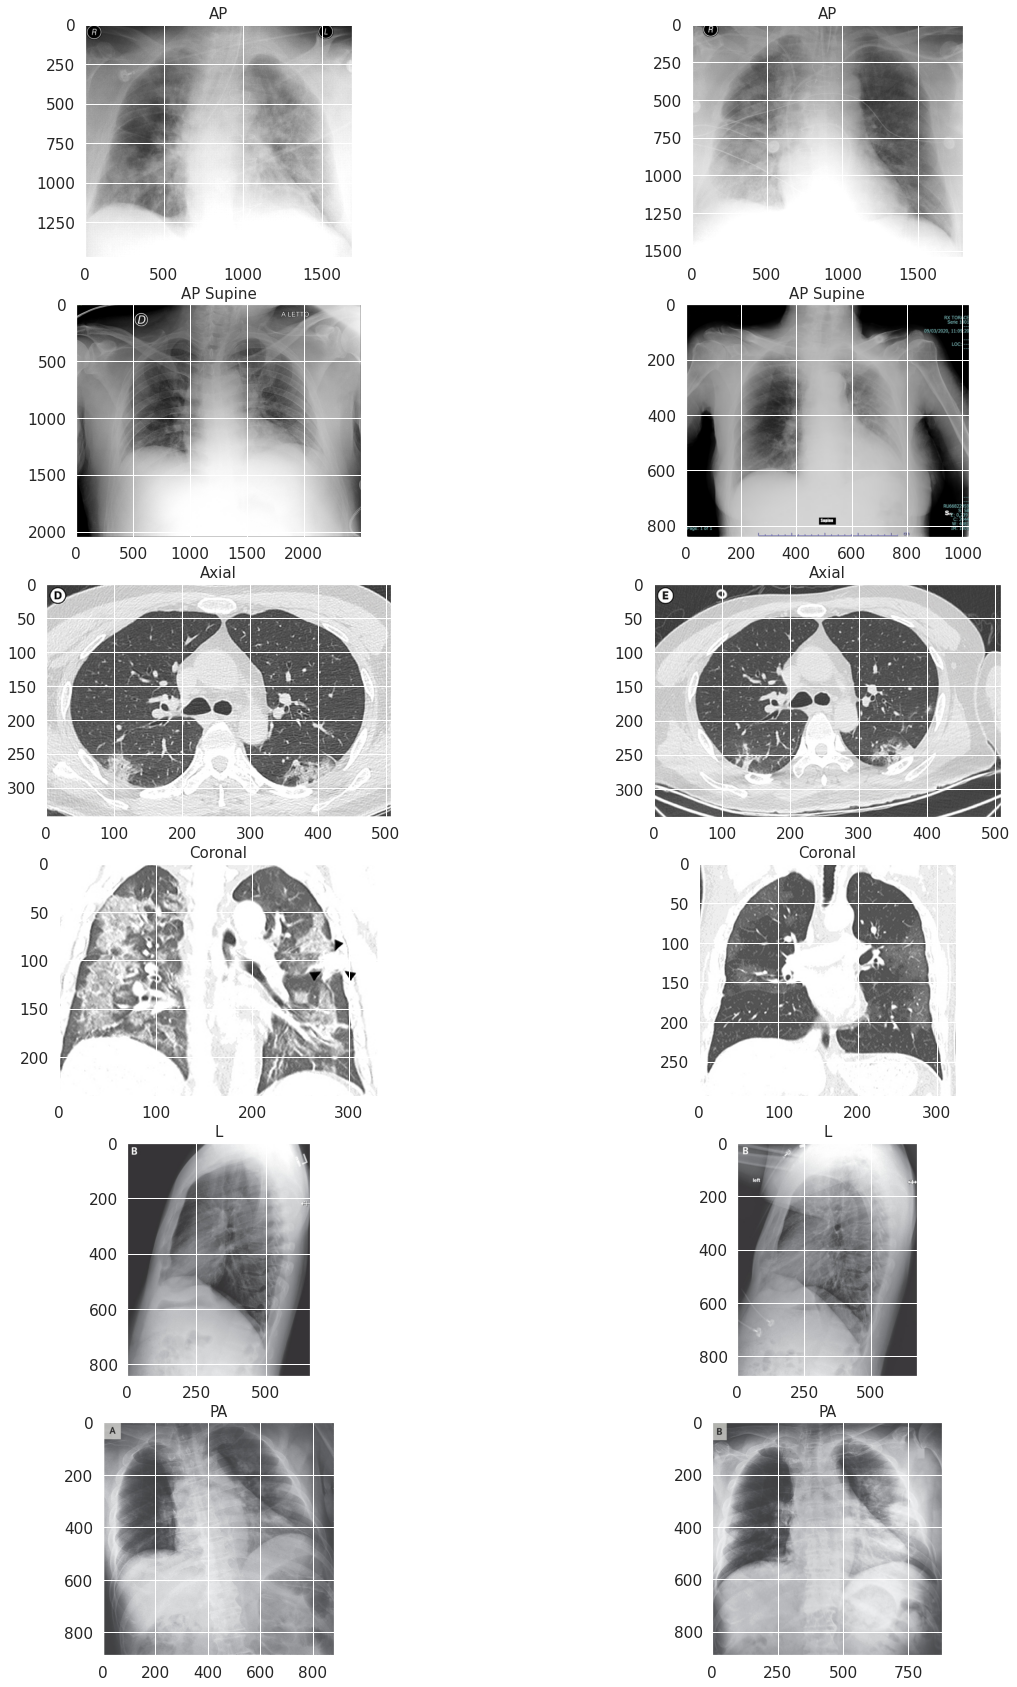

In [58]:
# explore sample for each "view"
from PIL import Image

sample_df = data_covid.groupby(['view']).head(2).sort_values(by=['view']).reset_index(drop=True)

rows = int(sample_df.shape[0]/2)
fig, ax = plt.subplots(nrows=rows, ncols=2,figsize=(20,rows*5))
ax = ax.flatten()
i = 0
for i, row in sample_df.iterrows():
  view = row['view']
  img = Image.open(row['image_path'])
  ax[i].imshow(img, cmap = 'gray')
  ax[i].set_title(view, size = 15)

In [67]:
# take only COVID and PA, AP Supine and AP
data_covid_final = data_covid[(data_covid['finding'] == 'COVID-19') & (data_covid['view'].isin(['PA', 'AP', 'AP Supine'])) &
                              (data_covid['file_extension'] != '.gz')]
display(data_covid_final['finding'].value_counts())
print('\n\n')
display(data_covid_final['view'].value_counts())
print('\n\n')
display(data_covid_final['file_extension'].value_counts())

COVID-19    422
Name: finding, dtype: int64

PA           206
AP Supine    121
AP            95
Name: view, dtype: int64

.jpg     207
.png     127
.jpeg     87
.JPG       1
Name: file_extension, dtype: int64

In [ ]:
sample_df = data_covid_final.groupby(['view']).head(8).sort_values(by=['view']).reset_index(drop=True)

rows = int(sample_df.shape[0]/4)
fig, ax = plt.subplots(nrows=rows, ncols=4,figsize=(20,rows*5))
ax = ax.flatten()
i = 0
for i, row in sample_df.iterrows():
  view = row['view']
  img = Image.open(row['image_path'])
  ax[i].imshow(img, cmap = 'gray')
  ax[i].set_title(view, size = 15)

In [70]:
# for normal images we use the fast.ai crawler
from fastai.vision import *

input_path = Path('chest_xray/test/NORMAL/') 
fnames = get_image_files(input_path)


fnames = map(lambda x: ['NORMAL', x], fnames)
normal_xray_df = pd.DataFrame(fnames, columns=['finding', 'filename'])